# Web Scraping using Python

Web Scraping is a technique employed to extract large amounts of data from websites whereby the data is extracted and saved to a local file in your computer or to a database in table format.

# Why web scraping?

1. It's a solution to speed up the data collection process.
2. Write once, run many times.

# Scraping a Book Recommendation Website

Website url : https://www.penguin.co.uk/articles/2018/100-must-read-classic-books/

Importing Essential Libraries

In [1]:
from bs4 import BeautifulSoup                  # for parsing structured data
import requests                                # for retrieving HTML data
import pandas as pd                            # for file operations

Performing a HTML code request to the url. It retrieves the HTML data that the server sends back and stores that data in a Python object.

In [2]:
url= "https://www.penguin.co.uk/articles/2018/100-must-read-classic-books/"
response= requests.get(url)

Making sure we got the response

In [3]:
response

<Response [200]>

Creating a BeautifulSoup object that takes the HTML content with the html parser

In [4]:
soup= BeautifulSoup(response.text,'html.parser')

Inspecting the web page.

Right clicking on the page and click on the inspect option

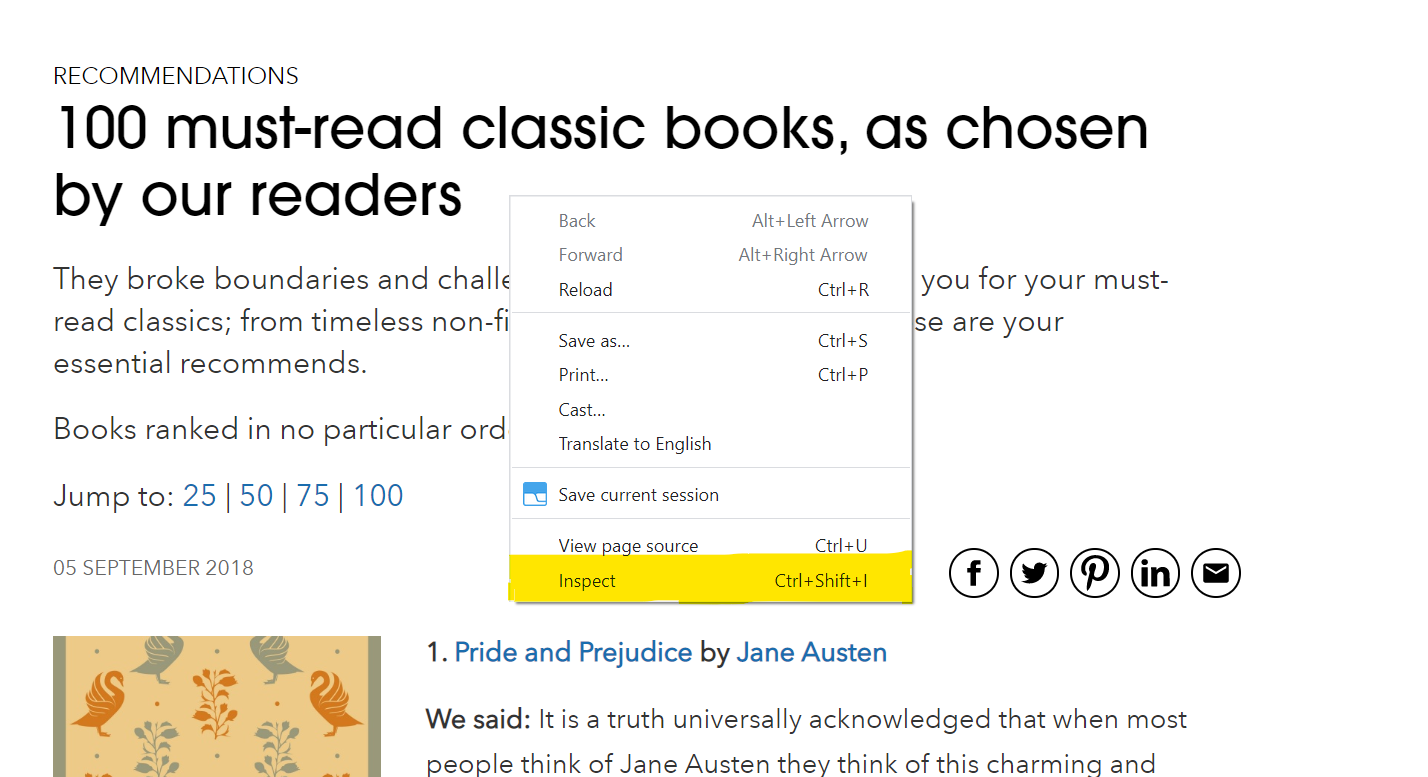

When we click on the Inspect option, we get:

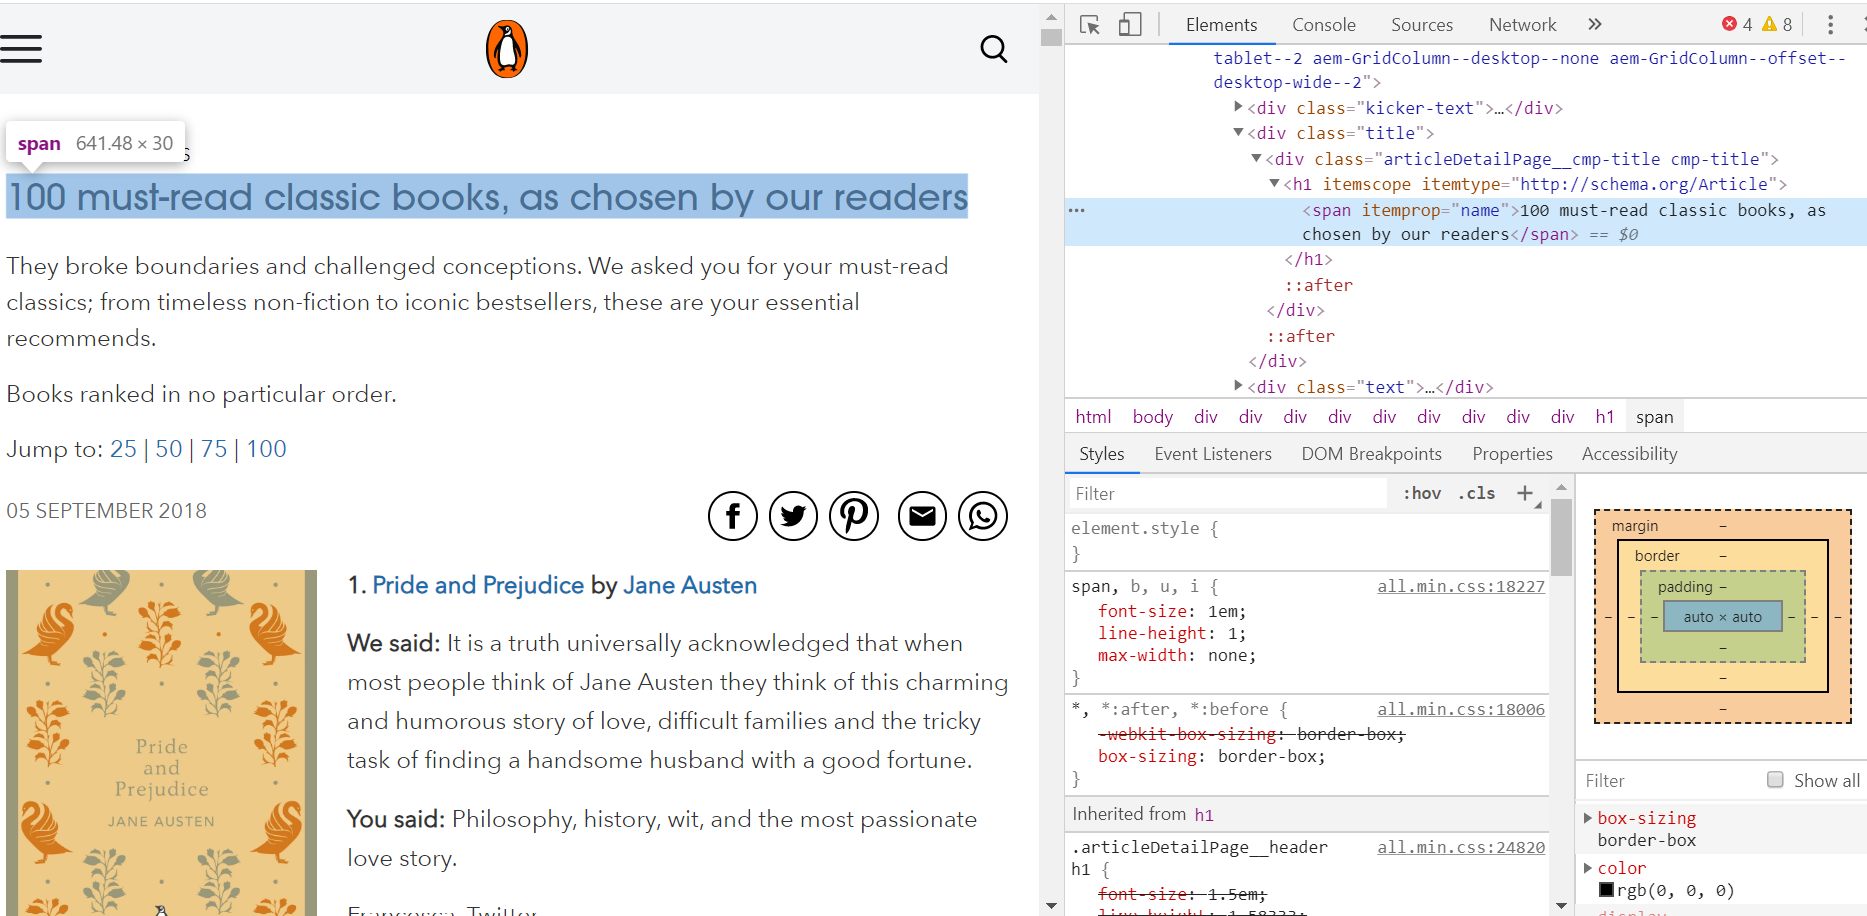

To get the content of all books 

In [5]:
books= soup.find_all('div',{"class": "bookCard__wrapper"})

Notice that all book content i.e title, image and summary text falls under the bookCard_wrapper class. That is why we need to get all the tags having this particular classs.

Creating a dictionary which will store the content of our page.

In [6]:
books_dict={}

In [7]:
book_number=0

Now, to get the contents of the web, we need to execute the following code to:
1. Get the title og the book which lies under h5 tag and 'smallCardTitle bookCard__title' class.
2. Get the author of the book which lies under h6 tag and smallCardSubtitle bookPromo__details__authorName' class.
3. Get the link of the book  
4. Get inside the link of every book and extract book details.
5. Storing all the details in a dictionary.

In [18]:
booklist=[]
for book in books:
    title = book.find('h5',{'class': 'smallCardTitle bookCard__title'}).text
    author= book.find('h6',{'class': 'smallCardSubtitle bookPromo__details__authorName'}).text
    link= book.find('a',{'class': 'button button--scale button--fullWidth bookCard__cta'}).get('href')
    details= requests.get("http://www.penguin.co.uk"+link)
    individual_book= "http://www.penguin.co.uk"+details.text
    book_soup= BeautifulSoup(individual_book,'html.parser')
    publisher= book_soup.find('p',{'itemprop':'publisher'}).text
    date_published= book_soup.find('p',{'itemprop':'datePublished'}).text
    isbn= book_soup.find('p',{'itemprop':'isbn'}).text
    numberOfPages= book_soup.find('p',{'itemprop':'numberOfPages'}).text
    
    book_number+=1
    books_dict[book_number]=[title,author,link,publisher,date_published,isbn,numberOfPages]

In [19]:
books_dict

{1: ['Pride and Prejudice',
  'Jane Austen ',
  '/books/183689/pride-and-prejudice/9780141199078.html',
  'Imprint: Penguin Classics',
  'Published: 06/12/2012',
  'ISBN: 9780141199078',
  'Length: 416 \xa0Pages'],
 2: ['To Kill A Mockingbird',
  'Harper Lee ',
  '/books/1088099/to-kill-a-mockingbird/9781784752637.html',
  'Imprint: Arrow',
  'Published: 04/06/2015',
  'ISBN: 9781784752637',
  'Length: 320 \xa0Pages'],
 3: ['The Great Gatsby',
  'F. Scott Fitzgerald ',
  '/books/56606/the-great-gatsby/9780141182636.html',
  'Imprint: Penguin Classics',
  'Published: 24/02/2000',
  'ISBN: 9780141182636',
  'Length: 240 \xa0Pages'],
 4: ['One Hundred Years of Solitude',
  'Gabriel Garcia Marquez ',
  '/books/56215/one-hundred-years-of-solitude/9780241968581.html',
  'Imprint: Penguin',
  'Published: 06/03/2014',
  'ISBN: 9780241968581',
  'Length: 432 \xa0Pages'],
 5: ['In Cold Blood',
  'Truman Capote ',
  '/books/57020/in-cold-blood/9780141182575.html',
  'Imprint: Penguin Classics',
 

Checking the length of books_dict to make sure we get the data of all 100 books

In [20]:
len(books_dict)

200

# Storing details in a Dataframe

In [21]:
columns=['Book Name', 'Author','Link','Publisher','Date of Publish','ISBN','Pages']                           #naming the columns

In [22]:
df= pd.DataFrame.from_dict(books_dict, orient='index', columns= columns)           #creating a datframe to store the dictionary content

In [13]:
df

,Book Name,Author,Link,Publisher,Date of Publish,ISBN,Pages
1,Pride and Prejudice,Jane Austen,/books/183689/pride-and-prejudice/978014119907...,Imprint: Penguin Classics,Published: 06/12/2012,ISBN: 9780141199078,Length: 416 Pages
2,To Kill A Mockingbird,Harper Lee,/books/1088099/to-kill-a-mockingbird/978178475...,Imprint: Arrow,Published: 04/06/2015,ISBN: 9781784752637,Length: 320 Pages
3,The Great Gatsby,F. Scott Fitzgerald,/books/56606/the-great-gatsby/9780141182636.html,Imprint: Penguin Classics,Published: 24/02/2000,ISBN: 9780141182636,Length: 240 Pages
4,One Hundred Years of Solitude,Gabriel Garcia Marquez,/books/56215/one-hundred-years-of-solitude/978...,Imprint: Penguin,Published: 06/03/2014,ISBN: 9780241968581,Length: 432 Pages
5,In Cold Blood,Truman Capote,/books/57020/in-cold-blood/9780141182575.html,Imprint: Penguin Classics,Published: 03/02/2000,ISBN: 9780141182575,Length: 320 Pages
...,...,...,...,...,...,...,...
96,One Day in the Life of Ivan Denisovich,Aleksandr Solzhenitsyn,/books/1032669/one-day-in-the-life-of-ivan-den...,Imprint: Vintage Classics,Published: 01/01/1996,ISBN: 9780099449270,Length: 176 Pages
97,What a Carve Up!,Jonathan Coe,/books/56289/what-a-carve-up-/9780241978917.html,Imprint: Penguin,Published: 04/08/2016,ISBN: 9780241978917,Length: 512 Pages
98,Zen And The Art Of Motorcycle Maintenance,Robert Pirsig,/books/1038662/zen-and-the-art-of-motorcycle-m...,Imprint: Vintage Classics,Published: 06/06/1991,ISBN: 9780099786405,Length: 432 Pages
99,White Nights,Fyodor Dostoyevsky,/books/292382/white-nights/9780241252086.html,Imprint: Penguin Classics,Published: 03/03/2016,ISBN: 9780241252086,Length: 128 Pages


# Last Step: Storing data in CSV File

This will store the above data into a CSV file 'BookData.csv'

In [23]:
df.to_csv('BookData.csv')